# <span style="color:green"> ESERCITAZIONE 8 </span>

### <span style="color:blue">  Esercizio 08.1 </span>

<span style="color:blue"> Scrivi un codice Monte Carlo Variazionale per lo stato di particella singola 1D che usa l'algoritmo di Metropolis per campionare il modulo quadro della funzione d'onda, ansatz $|\Psi_T^{\sigma,\mu}(x)|^2$, usando una probabilità di transizione uniforme $T(x_{new}|x_{old})$. Calcola il valore di aspettazione dell'Hamiltoniana per lo stato fondamentale risolvendo l'integrale ad essa associato, con il metodo del data blocking. </span>

L'obiettivo di questo esercizio è ottimizzare con il metodo variazionale, lo stato fondamentale di una particella in una dimensione, confinata nello spazio in una buca di potenziale esterno $V(x)$. Poiché questo modello quantistico non è risolvibile analiticamente, lo dobbiamo risolvere con i metodi numerici. La vera funzione che descrive lo stato fondamentale non è nota, però possiamo scrivere un ansatz della funzione d'onda che gli assomiglia: 

\begin{equation}
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}.                         
\end{equation}

Possiamo fare due osservazioni relativamente alla funzione d'onda:
1) **Non è nota la normalizzazione**. Questo non è un problema perché, con l'algoritmo di Metropolis, questa si semplifica facendo il rapporto tra probabilità dello stato nuovo e dello stato vecchio. Questo è proprio uno dei vantaggi nell'utilizzare l'algoritmo di Metropolis in queste situazioni. 

2) **Dipende da due parametri variazionali** $\mu$ e $\sigma$. In questo esercizio, ho deciso in maniera intuitiva dei valori iniziali che potrebbero andare bene: $\mu=1.0$ e $\sigma=0.5$. Nel caso in cui in realtà non siano particolarmente azzeccati, nel prossimo esercizio, implementando nel codice un secondo algoritmo di Metropolis, questi due parametri saranno ottimizzati, ossia saranno modificati in modo da avvicinarsi il più possibile a quelli giusti.

Risolviamo il problema nel caso più semplice: per una sola particella, in una dimensione, nello stato fondamentale. Viene fornito con il testo dell'esercizio, uno specchietto risolutivo in Python per questo caso in maniera analitica. Osserviamo che l'esecuzione del codice Python è veloce, ma solo in questo caso. Addentrandoci in un problema a molti corpi, aumentano il numero di particelle e le dimensioni dello spazio e consideriamo anche gli stati eccitati: risolverlo in maniera analitica diventa pressoché impossibile. Per questo impariamo a risolvere il problema con il metodo Monte Carlo Variazionale.

Per selezionare le posizioni con l'algoritmo di Metropolis, ho scelto delta $=2.43$, perché dà come percentuale di accettazione $50\%$. Per calcolare il valore finale del potenziale uso il metodo della media a blocchi. Ogni blocco è costituito di $10^{4}$ elementi e in tutto sono $100$ blocchi, per un totale di $10^{6}$ lanci . Prima di iniziare la simulazione vera e propria, il codice fa l'equilibrazione del sistema con un blocco di $10^{4}$ elementi.

### Risultati e grafici

Il primo grafico rappresenta la densità di probabilità $|\Psi_T^{\sigma,\mu}(x)|^2$, ponendo $\mu=1.0$ e $\sigma=0.5$. Essendo la funzione d'onda la somma di due funzioni d'onda, ci aspettiamo un istogramma costituito da due gaussane identiche e separate, con due picchi simmetrici e con un minimo al centro. In questo caso ci aspettiamo due gaussiane separate con picchi in $+1$ e in $-1$ e con larghezza a metà altezza $0.5$. Il centro della figura deve essere $0$.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

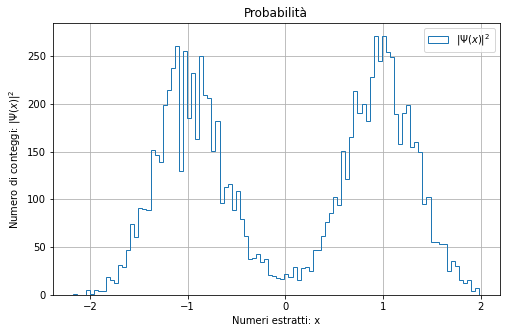

In [9]:
plt.figure(figsize=(8,5))
prob = np.loadtxt("Risultati_08.1/Psi_10_05.dat", usecols=(1), delimiter='  ', unpack='True')

n_bins = 100
probability_hist = plt.hist(prob, n_bins, label='$|\Psi(x)|^{2}$', histtype='step')

plt.xlabel('Numeri estratti: x')
plt.ylabel('Numero di conteggi: $|\Psi(x)|^{2}$')
plt.title('Probabilità')

plt.grid(True)
plt.legend()
plt.show()

Il secondo grafico consiste nel calcolo dell'energia dello stato fondamentale per $\Psi_T^{\sigma,\mu}(x)$, ponendo $\mu=1.0$ e $\sigma=0.5$, con il metodo della media a blocchi.

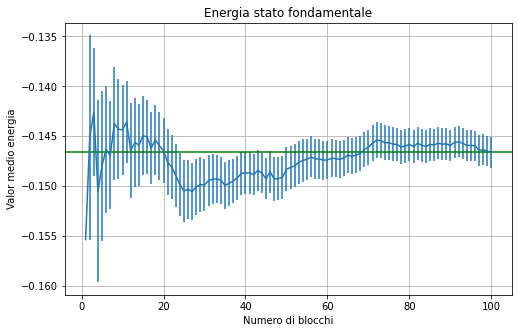

In [10]:
plt.figure(figsize=(8,5))

x, f, error = np.loadtxt("Risultati_08.1/Energia_GS_10_05.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=-0.146605, color='green')

plt.xlabel('Numero di blocchi')
plt.ylabel('Valor medio energia')
plt.title('Energia stato fondamentale')

plt.grid(True)
plt.show()

L'energia converge a $-0.146605$ che non è $-0.460466$ previsto dal modello teorico, proposto dallo specchietto risolutivo nel testo dell'esercizio. Il motivo di tale discrepanza potrebbe essere il fatto che abbiamo scelto $\mu$ e $\sigma$ a intuito e non con una logica corretta. Per questo l'obiettivo del prossimo esercizio sarà implementare un altro metodo Monte Carlo per stimare in maniera più corretta i parametri variazionali $\mu$ e $\sigma$.

### <span style="color:blue">  Esercizio 08.2 </span>

<span style="color:blue"> Per trovare i parametri $\mu$ e $\sigma$ che minimizzano $\langle {\hat H} \rangle_T$, estendi il codice Monte Carlo Variazionale per risolvere il problema dell'ottimizzazione variazionale tramite la tecnica del simulated annealing. Scegli una temperatura di partenza e un parametro di aggiornamento della temperatura appropriati. </span>

### Simulated annealing

La tecnica del **simulated annealing** consiste nel trovare l'energia dello stato fondamentale di un sistema abbassando gradualmente la sua temperatura. Questo algoritmo appartiene alla categoria degli **algoritmi metauristici**, che si ispirano a dei fenomeni naturali. In questo caso specifico, possiamo fare un'analogia con il **processo di raffreddamento** di un liquido. Ad alta temperatura, le molecole del liquido si muovono liberamente una rispetto all'altra. 

**Abbassando gradualmente la temperatura**, le molecole perdono gradualmente la loro mobilità, fino a fermarsi formando una struttura cristallina ordinata: questa è la **configurazione che ha la minore energia** possibile. E' importante che la temperatura si abbassi gradualmente. Infatti **se raffreddiamo** il sistema **rapidamente**, le molecole non hanno il tempo di disporsi sul reticolo cristallino, ma si fermano in posizioni casuali. Non si forma un solido ordinato, bensì un **solido amorfo**, come il vetro e la sua **energia è superiore** rispetto a quella dello stato fondamentale. 

Un **problema di ottimizzazione** può essere **risolto interpretandolo come** un problema di **raffreddamento** di un sistema. Bisogna intrepretare la **funzione costo** $L(x)$ come l'**energia** del sistema che è la quantità che deve essere **ridotta** e per fare questo bisogna campionare il peso di Boltzmann:
\begin{equation}
   p(x) = \frac{1}{Z} \exp(-\beta L(x)), \quad \quad \beta = \frac{1}{k_{B}T}.
\end{equation}

Abbassando gradualmente la temperatura $T$, il parametro $\beta$ diventa sempre più grande e il peso di Boltzmann $p(x)$ si riduce. In questo modo la **distribuzione** diventa **sempre più centrata nel minimo** di $L(x)$, ossia dell'energia, che è il valore che vorremmo calcolare. 

Il codice già contiene una funzione Monte Carlo che campiona il peso di Boltzmann $p(x)$, muovendo la $x$ e scegliendo quella tale per cui l'energia dello stato fondamentale del sistema è minore. Per svolgere questo esercizio, **aggiungiamo una seconda funzione** Monte Carlo che muova i parametri $\mu$ e $\sigma$ in modo da scegliere quelli che minimizzano l'energia a quella data temperatura $T$. Questa è la configurazione da cui inizia il ciclo successivo, che riesegue il processo per una temperatura $T$ più piccola. Il **processo viene ripetuto riducendo** ad ogni ciclo $T$, in maniera costante, fino a quando viene raggiunto valore di $T$ che conclude il processo di **raffeddamento**. L'**ultima energia** calcolata dal codice corrisponde a quella dello **stato fondamentale**, che stiamo cercando. 

Il **Principio Variazionale** dice che il valore di aspettazione dell'Hamiltoniana $\langle {\hat H} \rangle_T$ su uno stato di prova ha come minimo l'energia dello stato fondamentale. Noi **non conosciamo la vera funzione d'onda** dello stato fondamentale, ma stiamo usando un ansatz che le si avvicina molto. Questo significa che l'energia che il **codice calcolerà** non sarà la vera energia dello stato fondamentale, ma **un'energia leggermente superiore**.

### Funzionamento del codice

Ecco l'idea di funzionamento del codice.
1. Fisso la temperatura $T$: all'inizio è alta e decrescerà ad ogni ciclo di un parametro costante fissato. 
2. Fissati i **valori vecchi** di $\mu$ e di $\sigma$, muovo più volte la posizione con un Metropolis per calcolare l'energia: en_old.
3. Campiono $\mu$ e $\sigma$ da una probabilità di transizione uniforme $[0,1)$ centrata sui valori attuali per trovare i valori nuovi.
4. Con i **nuovi valori** di $\mu$ e di $\sigma$ muovo più volte la posizione con lo stesso Metropolis di prima per calcolare l'energia: en_new.
5. Uso delta_en$=$en_new$-$en_old per decidere con un secondo Metropolis se accettare la mossa per campionare $\exp(-en/T)$.
6. Finite le iterazioni a $T$ fissata, abbasso la temperatura e ritorno al punto $2$ proseguendo dai valori di $\mu$ e di $\sigma$ a cui sono arrivato. 
7. Ripeto il processo fino ad arrivare ad una $T$ molto piccola, alla quale considero il sistema raffreddato.

Per il calcolo delle energie vecchia e nuova uso la media a blocchi implementata nell'esercizio precedente: la funzione Energy che calcola l'energia racchiude in sé la media a blocchi dell'esercizio $08.1$. Il risultato che restituisce è il valore dell'energia calcolato grazie alla media su tutti i blocchi. 

Ciascun blocco della **media a blocchi** è costituito da $1000$ elementi e i blocchi sono $20$ per ogni media. Durante questa media a blocchi muovo la posizione **per calcolare l'energia**. Ogni ciclo di algoritmo di Metropolis contiene **due medie** a blocchi fatti come detto prima per calcolare en_old ed en_new. I cicli di **algoritmo di Metropolis per variare** $\mu$ e $\sigma$ sono $10$. Durante ciascuno di questi calcolo en_old grazie a mu_old e a sigma_old e calcolo en_new grazie a mu_new e a sigma_new. **Ripeto** il processo dei $10$ Metropolis in cui vario $\mu$ e $\sigma$ **per** $300$ **temperature**. La temperatura iniziale è $1.0$ che decresce con un passo costante di $0.003333$. La temperatura più piccola per cui calcolo l'energia è $0.003333$, dopodiché il processo si arresta.

### Risultati e grafici

I risultati dell'esercizio $08.2$ sono i seguenti valori di energia dello stato fondamentale, con relativa incertezza, ottenuti per i valori mu e sigma:

\begin{equation}
   en = -0.449749 \pm 0.00514463 \quad \mu = -0.807175 \quad \sigma = 0.606267.
\end{equation}

Il fatto che $\mu$ venga negativo non è un problema, perché i risultati sono simmetrici per i valori dei parametri cambiati di segno. Questi risultati si ottengo per temperatura $=0.01$, la terzultima della serie. Per le **ultime due temperature** osserviamo che i **risultati restano sempre uguali**. Se confrontiamo questi risultati con la percentuale di accettazione, osserviamo che per le ultime due temperature la **percentuale di accettazione** delle mosse è dello $0\%$. Questo significa che finalmente il **sistema si è raffreddato**: ha raggiunto la sua configurazione cristallina, lo **stato fondamentale e non si muove più**.

Ottenuti i **valori desiderati** di $\mu$ e $\sigma$ tramite il simulated annealing dell'esercizio $08.2$, li abbiamo **sostituiti** nel codice dell'esercizio $08.1$, al posto dei valori iniziali che avemvamo scelto usando un po' di buon senso e abbiamo calcolato l'energia dello stato fondamentale, sempre con il metodo della media a blocchi. Abbiamo anche ricalcolato la densità di probabilità $|\Psi_T^{\sigma,\mu}(x)|^2$, per questi nuovi valori. Segue il grafico del modulo quadro della funzione d'onda.

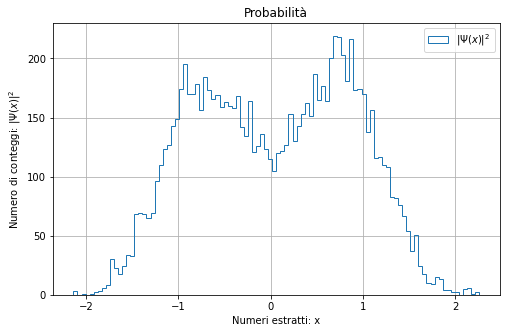

In [11]:
plt.figure(figsize=(8,5))
prob = np.loadtxt("Risultati_08.1/Psi_08_06.dat", usecols=(1), delimiter='  ', unpack='True')

n_bins = 100
probability_hist = plt.hist(prob, n_bins, label='$|\Psi(x)|^{2}$', histtype='step')

plt.xlabel('Numeri estratti: x')
plt.ylabel('Numero di conteggi: $|\Psi(x)|^{2}$')
plt.title('Probabilità')

plt.grid(True)
plt.legend()
plt.show()

Il secondo grafico consiste nel calcolo dell'energia dello stato fondamentale per $\Psi_T^{\sigma,\mu}(x)$, ponendo $\mu=-0.807175$ e $\sigma=0.606267$.

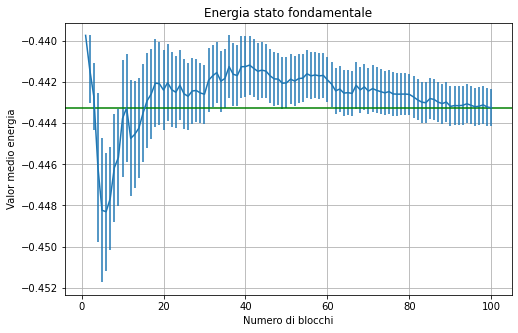

In [12]:
plt.figure(figsize=(8,5))

x, f, error = np.loadtxt("Risultati_08.1/Energia_GS_08_06.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=-0.443251, color='green')
#plt.axhline(y=-0.460466, color='red') #Valore calcolato analiticamente

plt.xlabel('Numero di blocchi')
plt.ylabel('Valor medio energia')
plt.title('Energia stato fondamentale')

plt.grid(True)
plt.show()

Osserviamo che l'**energia** dello stato fondamentale converge a $-0.443251$ che è **leggermente superiore** al valore di aspettazione teorico calcolato analiticamente: $-0.460466$. Ci aspettavamo che venisse così in base al **principio variazionale**. Sostituendo i parametri variazionali trovati risolvendo l'esercizio $08.2$, all'interno del codice dell'esercizio $08.1$, si trova che l'energia dello stato fondamentale è leggermente superiore ma ha incertezza minore:

\begin{equation}     
   en = -0.443251 \pm 0.000897523 \quad \mu = -0.807175 \quad \sigma = 0.606267.
\end{equation}

Con il testo dell'Esercitazione ci è stato donato uno specchietto Python che risolve l'Hamiltoniana del problema che calcola: 

1. energia dello stato fondamentale e di primo e secondo stato eccitato,
2. funzione d'onda al quadrato di stato fondamentale e di primo e secondo stato eccitato,
3. potenziale a doppia buca del problema.

Riporto qui sotto lo specchietto, tenendo conto solo dello stato fondamentale. Confornto le $|\Psi_T^{\sigma,\mu}(x)|^2$ ottenute analiticamente e mediante la simulazione.

Ground state energy theory:       -0.4604658796927152
Ground state energy simulation:   -0.443251


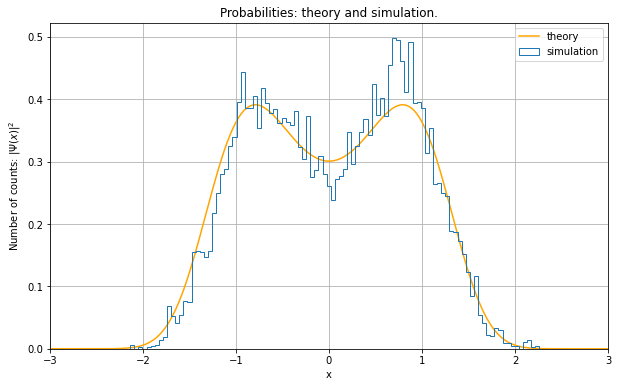

In [13]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy theory:      ", E[0])
print("Ground state energy simulation:  ", -0.443251)

# Plot Hamiltonian solution
plt.figure(figsize=(10,6))
#scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label='theory', color="orange")

# Plot histogram
prob = np.loadtxt("Risultati_08.1/Psi_08_06.dat", usecols=(1), delimiter='  ', unpack='True')
n_bins = 100
probability_hist = plt.hist(prob, n_bins, label='simulation', histtype='step', density='True')

plt.title("Probabilities: theory and simulation.")
plt.xlabel("x")
plt.ylabel('Number of counts: $|\Psi(x)|^{2}$')

plt.grid(True)
plt.xlim((-3,3))

plt.legend()
plt.show()

Ho riscalato l'istogramma in modo che, anziché riportare il vero numero di conteggi, abbia delle dimensioni sull'asse $y$ comprese tra $0$ e $1$ e che mantenga la stessa forma dell'originale. Osserviamo che la curva **teorica si sovrappone all'istogramma** dei conteggi risultante dalla simulazione. I due grafici visti sopra sono il risultato di ripetere l'esercizio 08.1 usando i valori di $\mu$ e di $\sigma$ che minimizzano l'energia. 

Di seguito vediamo i grafici relativi all'esercizio 08.2, ossia al processo del simulated annealing. Il primo grafico mostra **come varia l'energia** ad ogni ciclo della **temperatura che decresce**. Questo grafico è realizzato in funzione dello step che rappresenta beta, inverso della temperatura in modo da avere sull'asse $x$ un parametro che aumenta: in questo modo possiamo leggere il grafico da sinistra a destra. Sull'asse $y$ è riportata l'energia. 

Per realizzare i grafici, ho rieseguito la simulazione in modo da sostituire ad ogni beta l'ordine in cui appare durante il processo di simulated annealing, ossia un intero: $1$, $2$, ... , $300$: questo perché i punti all'inizio della simulazione sarebbero troppo addensati, mentre quelli alla fine troppo diluiti.

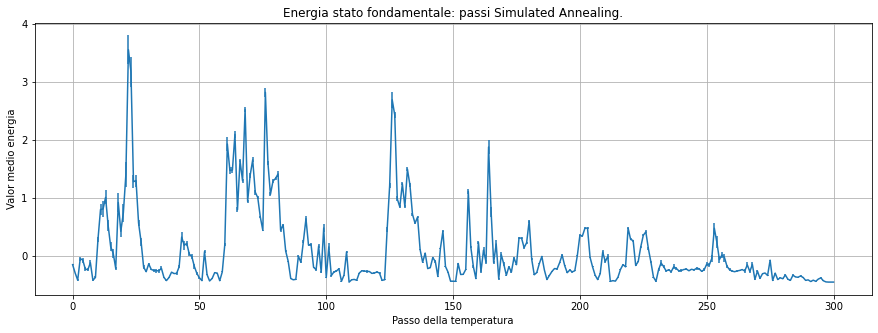

In [19]:
plt.figure(figsize=(15,5))

x, f, error = np.loadtxt("Risultati_08.2/SA_steps.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)

plt.xlabel('Passo della temperatura')
plt.ylabel('Valor medio energia')
plt.title('Energia stato fondamentale: passi Simulated Annealing.')

plt.grid(True)
plt.show()

Le barre di errore non si vedono perché sono piccole. L'energia dello stato fondamentale è spesso negativa, come dovrebbe essere, ma a volte diventa positiva. Nel corso della simulazione si formano questi picchi ma alla fine, per $\beta=300$ il sistema si raffredda e l'energia viene compatibile con la teoria. 

Infine sono mostrati due grafici in $3D$. Il primo rappresenta la **traiettoria** di $\mu$ e di $\sigma$ **in funzione degli step** del simulated anneling. Questo grafico mostra come evolvono i due parametri variazionali nel corso del raffreddamento. Il secondo rappresenta l'**energia** posseduta dal sistema **per ogni coppia** $\mu$ e $\sigma$. Con questo grafico desideriamo vedere per quali valori dei parametri variazionali si ottiene il minimo dell'energia.

L'evoluzione dei punti con coordinate $\mu$ e $\sigma$ in funzione degli step di $\beta$ si osserva dal basso verso l'alto.

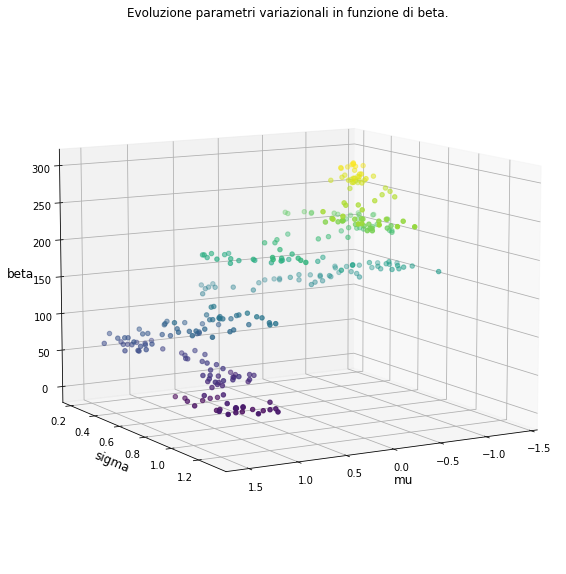

In [30]:
beta, mu, sigma = np.loadtxt("Risultati_08.2/mu_sigma_steps.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mu, sigma, beta, c=beta, cmap='viridis', marker='o')

ax.set_xlabel('mu', fontsize=(12))
ax.set_ylabel('sigma', fontsize=(12))
ax.set_zlabel('beta', fontsize=(12))
ax.view_init(10, 60)

plt.title("Evoluzione parametri variazionali in funzione di beta.", fontsize=(12))
plt.show()

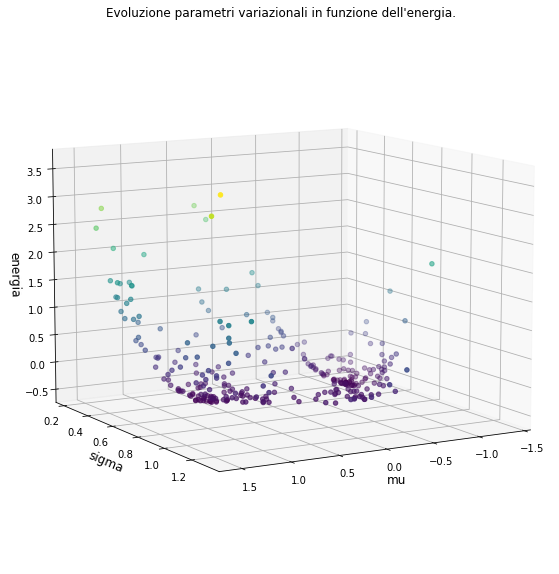

In [29]:
en, mu, sigma = np.loadtxt("Risultati_08.2/en_mu_sigma.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(mu, sigma, en, c=en, cmap='viridis', marker='o')

ax.set_xlabel('mu', fontsize=(12))
ax.set_ylabel('sigma', fontsize=(12))
ax.set_zlabel('energia', fontsize=(12))
ax.view_init(10, 60)

plt.title("Evoluzione parametri variazionali in funzione dell'energia.", fontsize=(12))
plt.show()

I grafici sotto rappresentano separatamente l'evoluzione di $\mu$ e di $\sigma$ in funzione degli step di $\beta$.

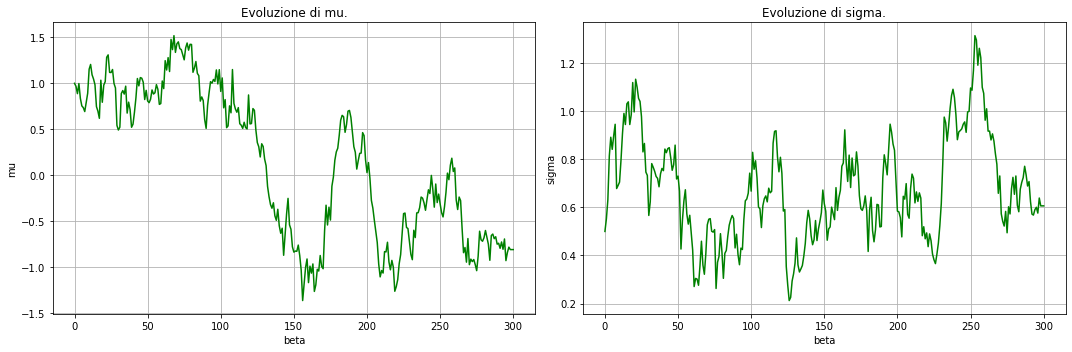

In [18]:
beta, mu, sigma = np.loadtxt("Risultati_08.2/mu_sigma_steps.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(beta, mu, color='green')
plt.title('Evoluzione di mu.')
plt.xlabel('beta')
plt.ylabel('mu')
plt.grid(True)

plt.subplot(122)
plt.plot(beta, sigma, color='green')
plt.title('Evoluzione di sigma.')
plt.xlabel('beta')
plt.ylabel('sigma')
plt.grid(True)

plt.tight_layout()
plt.show()

I due grafici sotto rappresentano separatamente prima per quale valore di $\mu$, poi per quale valore di $\sigma$ si ottiene il minimo dell'energia.

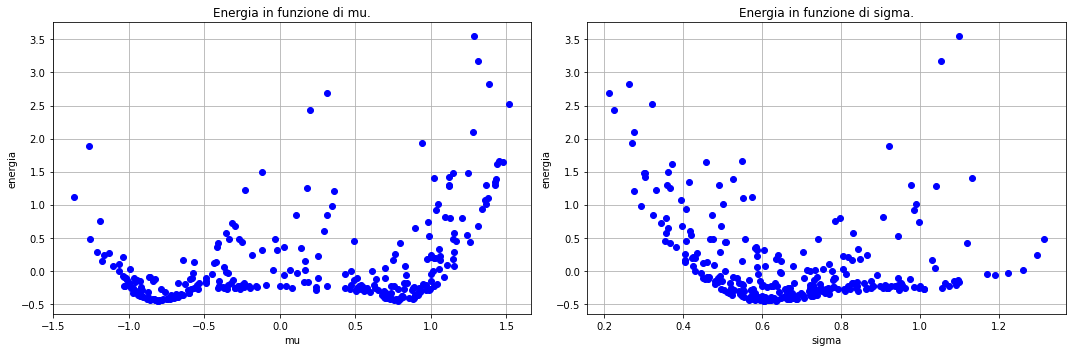

In [25]:
en, mu, sigma = np.loadtxt("Risultati_08.2/en_mu_sigma.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(mu, en, marker='o', color='blue', linestyle="")
plt.title('Energia in funzione di mu.')
plt.xlabel('mu')
plt.ylabel('energia')
plt.grid(True)

plt.subplot(122)
plt.plot(sigma, en, marker='o', color='blue', linestyle="")
plt.title('Energia in funzione di sigma.')
plt.xlabel('sigma')
plt.ylabel('energia')
plt.grid(True)

plt.tight_layout()
plt.show()

Gli ultimi grafici rappresentano lo **spazio dei parametri variazionali** $\mu$ e $\sigma$. Il **primo** grafico rappresenta l'**evoluzione** della coppia mu-sigma durante lo svolgimento della simulazione: la linea congiunge i punti nell'ordine in cui appaiono durante il raffreddamento. 

Il **secondo** grafico colora le coppie mu-sigma in base all'**energia** che queste producono. I colori scuri sono associati ai punti più freddi, ossia quelli con meno energia, quelli più vicini al minimo che stiamo cercando, mentre i colori chiari sono associati ai punti più caldi, ossia quelli con energia maggiore.

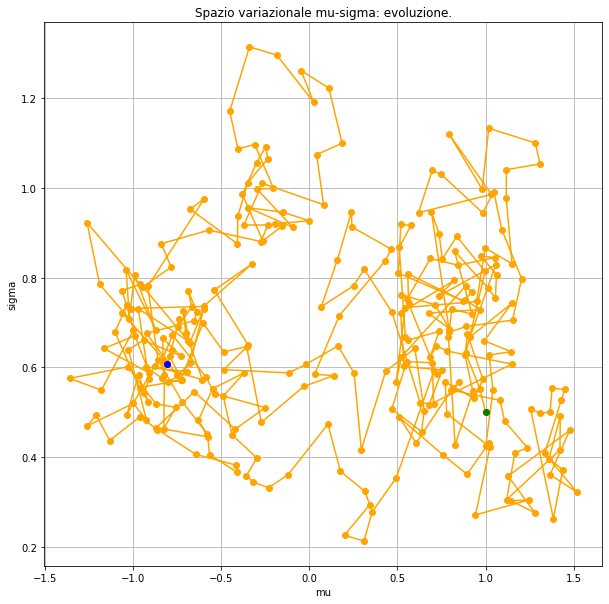

In [14]:
plt.figure(figsize=(10,10))

plt.plot(mu, sigma, marker='o', color='orange')
plt.plot(1.0, 0.5, marker='o', color='green') #punto iniziale
plt.plot(-0.807175, 0.606267, marker='o', color='blue') #punto finale

plt.title('Spazio variazionale mu-sigma: evoluzione.')
plt.xlabel('mu')
plt.ylabel('sigma')

plt.grid(True)
plt.show()

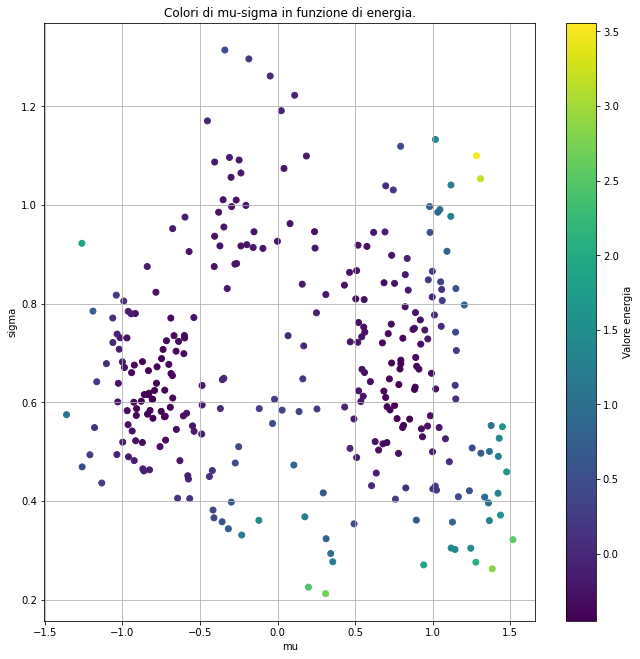

In [4]:
en, mu, sigma = np.loadtxt("Risultati_08.2/en_mu_sigma.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.figure(figsize=(11,11))
plt.scatter(mu, sigma, c=en, cmap='viridis')

plt.title('Colori di mu-sigma in funzione di energia.')
plt.xlabel('mu')
plt.ylabel('sigma')

plt.colorbar(label='Valore energia')
plt.grid(True)
plt.show()

### Conclusioni

L'obiettivo di questo esperimento era risolvere l'Hamiltoniana di una particella nello stato fondamentale in una dimensione, con una data funzione d'onda. Come risultato di questa operazione si ottiene l'**energia della particella**. Poiché questo problema si può risolvere analiticamente solo in questo caso semplice e non se si aumenta il numero di particelle o la dimensione, abbiamo imparato a **risolverlo numericamente**. 

La funzione d'onda dipende da dei **parametri variazionali** $\mu$ e $\sigma$. Con la tecnica del **simulated annealing** abbiamo raffreddato il sistema in modo che raggiungesse il **minimo dell'energia** e trovati i parametri variazionali a cui corrisponde questo minimo, abbiamo calcolato l'energia. 

Per svolgere la simulazione sono necessari **due algoritmi di Metropolis**: uno per campionare il **modulo quadro** della funzione d'onda per calcolare l'energia, l'altro per campionare il **peso di Boltzmann** per stabilire quale delle due energie accettare, dopo aver mosso i parametri. Il **raffreddamento** consiste nel ripetere l'esperimento campionando il peso di Boltzmann per diversi valori della temperatura che decresce gradualmente, fino a diventare quasi zero.

Abbiamo osservato che durante la simulazione, $\mu$ e $\sigma$ **esplorano tanto** lo spazio dei parametri variazionali prima di raggiungere la configurazione finale e che il valore finale dell'**energia è leggermente superiore** rispetto al valore teorico atteso, come predetto dalla teoria variazionale. L'esperimento è riuscito.